In [127]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### import

In [128]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt
import seaborn as sns

### Data Load

In [129]:
# 학습/평가 데이터 로드
train_df = pd.read_csv('/content/drive/MyDrive/용훈/Dacon/채무 불이행 확률 예측/open/train.csv').drop(columns=['UID'])
test_df = pd.read_csv('/content/drive/MyDrive/용훈/Dacon/채무 불이행 확률 예측/open/test.csv').drop(columns=['UID'])

In [130]:
train_df

,주거 형태,연간 소득,현재 직장 근속 연수,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,대출 목적,대출 상환 기간,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,채무 불이행 여부
0,자가,1941337.5,10년 이상,0.0,9,13.4,400597.5,0,24,1,부채 통합,단기 상환,390903.0,225457.5,8806.5,767,0
1,월세,1979505.0,10년 이상,0.0,5,15.1,360679.5,0,11,0,부채 통합,단기 상환,1002184.5,64749.0,24961.5,767,0
2,월세,1356381.0,4년,0.0,12,18.8,491770.5,1,74,3,부채 통합,단기 상환,227775.0,487644.0,12069.0,800,1
3,월세,1049017.5,6년,0.0,15,14.8,411546.0,1,22,1,부채 통합,단기 상환,251383.5,413211.0,31749.0,796,1
4,월세,4320217.5,2년,0.0,11,26.1,895288.5,0,32,0,부채 통합,장기 상환,1163176.5,78991.5,5862.0,751,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,주택 담보 대출 (거주 중),1339473.0,10년 이상,0.0,9,18.7,319027.5,0,68,0,부채 통합,단기 상환,126216.0,177028.5,6237.0,755,0
9996,주택 담보 대출 (거주 중),2297230.5,2년,0.0,11,28.3,399799.5,0,7,0,주택 개보수,장기 상환,371907.0,347449.5,53301.0,707,0
9997,주택 담보 대출 (거주 중),1221523.5,10년 이상,0.0,9,30.1,823305.0,0,14,0,부채 통합,장기 상환,869736.0,176905.5,11436.0,733,0
9998,자가,3343584.0,10년 이상,0.0,10,20.3,724314.0,0,25,0,부채 통합,단기 상환,443008.5,139294.5,25567.5,696,0


In [131]:
train_df.dtypes

,0
주거 형태,object
연간 소득,float64
현재 직장 근속 연수,object
체납 세금 압류 횟수,float64
개설된 신용계좌 수,int64
신용 거래 연수,float64
최대 신용한도,float64
신용 문제 발생 횟수,int64
마지막 연체 이후 경과 개월 수,int64
개인 파산 횟수,int64


In [132]:
# 결측치 없음
# print(train_df.isna().sum())
# print(test_df.isna().sum())

- 연간 소득의 경우 매우매우 많은 이상치가 존재 / 연간 소득 RobustScaler

In [133]:
# plt.boxplot(train_df['연간 소득'], vert=False)

# plt.show

# print(train_df['연간 소득'].min())
# print(train_df['연간 소득'].mean())
# print(train_df['연간 소득'].median())
# print(train_df['연간 소득'].max())

In [134]:
plt.rc('font', family='Malgun Gothic')
import math

# 수치형 컬럼 선택


# # 서브플롯 크기 조절
# num_features = len(num_cols)
# cols = 3  # 한 행에 표시할 컬럼 수
# rows = math.ceil(num_features / cols)  # 필요한 행 수 계산

# # 그래프 그리기
# fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))  # 전체 크기 조절
# axes = axes.flatten()  # 2D 배열을 1D로 변환

# for i, col in enumerate(num_cols):
#     sns.histplot(train_df[col], kde=True, ax=axes[i])  # 히스토그램 + KDE 추가
#     axes[i].set_title(col)  # 제목 설정

# # 빈 subplot 숨기기
# for i in range(num_features, len(axes)):
#     fig.delaxes(axes[i])

# plt.tight_layout()  # 간격 조정
# plt.show()


### Pre-processing(전처리)

In [135]:
# 월 상환 부채액
# 체납 세금 압류 횟수
# 주거 형태
# 대출 목적
# 현재 직장 근속 연수

# 위 컬럼 제거 후 한번 해보기

train_df = train_df.drop(columns=['대출 목적', '현재 직장 근속 연수'])
test_df = test_df.drop(columns=[ '대출 목적', '현재 직장 근속 연수'])
num_cols = train_df.select_dtypes(include=['number']).columns

In [136]:
categorical_col = [
    '주거 형태',
    # '현재 직장 근속 연수',
    # '대출 목적',
    '대출 상환 기간'
]

train_df = pd.get_dummies(train_df, columns=categorical_col, drop_first=True)
test_df = pd.get_dummies(test_df, columns=categorical_col, drop_first=True)

train_df

,연간 소득,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,채무 불이행 여부,주거 형태_자가,주거 형태_주택 담보 대출 (거주 중),주거 형태_주택 담보 대출 (비거주 중),대출 상환 기간_장기 상환
0,1941337.5,0.0,9,13.4,400597.5,0,24,1,390903.0,225457.5,8806.5,767,0,True,False,False,False
1,1979505.0,0.0,5,15.1,360679.5,0,11,0,1002184.5,64749.0,24961.5,767,0,False,False,False,False
2,1356381.0,0.0,12,18.8,491770.5,1,74,3,227775.0,487644.0,12069.0,800,1,False,False,False,False
3,1049017.5,0.0,15,14.8,411546.0,1,22,1,251383.5,413211.0,31749.0,796,1,False,False,False,False
4,4320217.5,0.0,11,26.1,895288.5,0,32,0,1163176.5,78991.5,5862.0,751,0,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1339473.0,0.0,9,18.7,319027.5,0,68,0,126216.0,177028.5,6237.0,755,0,False,True,False,False
9996,2297230.5,0.0,11,28.3,399799.5,0,7,0,371907.0,347449.5,53301.0,707,0,False,True,False,True
9997,1221523.5,0.0,9,30.1,823305.0,0,14,0,869736.0,176905.5,11436.0,733,0,False,True,False,True
9998,3343584.0,0.0,10,20.3,724314.0,0,25,0,443008.5,139294.5,25567.5,696,0,True,False,False,False


In [137]:
num_cols = num_cols.drop('채무 불이행 여부')
num_cols


Index(['연간 소득', '체납 세금 압류 횟수', '개설된 신용계좌 수', '신용 거래 연수', '최대 신용한도',
       '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수', '개인 파산 횟수', '현재 대출 잔액',
       '현재 미상환 신용액', '월 상환 부채액', '신용 점수'],
      dtype='object')

### Train / Validation Split (학습 데이터 분할)

In [138]:
X_train, X_val, y_train, y_val = train_test_split(
    train_df.drop(columns=['채무 불이행 여부']),
    train_df['채무 불이행 여부'],
    test_size=0.2,
    random_state=42
)

### StandardScaler

In [139]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_cols])
X_val_scaled = scaler.transform(X_val[num_cols])

# 2. 정규화 결과를 DataFrame으로 변환
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_cols, index=X_train.index)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=num_cols, index=X_val.index)

# 3. 원-핫 인코딩된 범주형 컬럼 추가
X_train_final = pd.concat([X_train_scaled, X_train.drop(columns=num_cols)], axis=1)
X_val_final = pd.concat([X_val_scaled, X_val.drop(columns=num_cols)], axis=1)

# 테스트 데이터도 동일한 방식으로 처리
test_df_scaled = scaler.transform(test_df[num_cols])
test_df_scaled = pd.DataFrame(test_df_scaled, columns=num_cols, index=test_df.index)
test_df_final = pd.concat([test_df_scaled, test_df.drop(columns=num_cols)], axis=1)

In [140]:
# # 불균형 데이터 처리
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_train_final, y_train)

# print("\nResampled class distribution:")
# print(pd.Series(y_resampled).value_counts())

### Model Training (모델 학습)

In [141]:
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['auc'], label='train_err', marker = '.')
    plt.plot(history['val_auc'], label='val_err', marker = '.')

    plt.ylabel('AUC')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

In [142]:
from keras.utils import clear_session
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.layers import BatchNormalization

# 입력 차원 (특성 개수)
nfeatures = X_train_final.shape[1]

a = 0.00
b = 0.0

# Sequential 모델 만들기
model = Sequential( [Input(shape = (nfeatures,)),
                    # Dense(1024, activation = 'relu', kernel_regularizer=l2(a)),
                    # Dropout(b),
                    # Dense(512, activation = 'relu', kernel_regularizer=l2(a)),
                    # BatchNormalization(),
                    # Dropout(b),
                    # Dense(256, activation = 'relu', kernel_regularizer=l2(a)),
                    # Dropout(b),
                    # Dense(128, activation = 'relu', kernel_regularizer=l2(a)),
                    # Dropout(b),
                    # Dense(64, activation = 'relu', kernel_regularizer=l2(a)),
                    # BatchNormalization(),
                    # Dropout(b),
                    # Dense(32, activation = 'relu', kernel_regularizer=l2(a)),
                    # BatchNormalization(),
                    # Dropout(b),
                    # Dense(16, activation = 'relu', kernel_regularizer=l2(a)),
                    # BatchNormalization(),
                    # Dropout(b),
                    # Dense(8, activation = 'relu', kernel_regularizer=l2(a)),
                    # Dropout(b),
                    Dense(1, activation= 'sigmoid')])


# 모델요약
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17 (68.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)

In [143]:
model.compile(optimizer = Adam(learning_rate=0.001), loss = 'binary_crossentropy', metrics=["auc"])

es = EarlyStopping(monitor = 'val_auc', min_delta = 0.001, patience = 10, mode='max', restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_auc', factor=0.3, patience=3, mode='max')

history = model.fit(X_train_final, y_train, epochs = 300, validation_data=(X_val_final, y_val), batch_size=128, callbacks = [es, lr_scheduler]).history

Epoch 1/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - auc: 0.5050 - loss: 0.7687 - val_auc: 0.5155 - val_loss: 0.7369 - learning_rate: 0.0010
Epoch 2/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - auc: 0.5108 - loss: 0.7369 - val_auc: 0.5411 - val_loss: 0.7032 - learning_rate: 0.0010
Epoch 3/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc: 0.5366 - loss: 0.7010 - val_auc: 0.5686 - val_loss: 0.6775 - learning_rate: 0.0010
Epoch 4/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - auc: 0.5546 - loss: 0.6719 - val_auc: 0.5955 - val_loss: 0.6583 - learning_rate: 0.0010
Epoch 5/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.5943 - loss: 0.6477 - val_auc: 0.6189 - val_loss: 0.6447 - learning_rate: 0.0010
Epoch 6/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - auc: 0.6092 - loss: 0.6360 - val_auc: 0.6393 - val_loss: 0.6341 - learning_rate: 0.0010
Epoch 7/300
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - auc: 0.6327 - loss: 0.6231 - val_auc: 0.6529 - val_loss: 0.6267 - learning_rate: 0.0010
Epoch 8/300


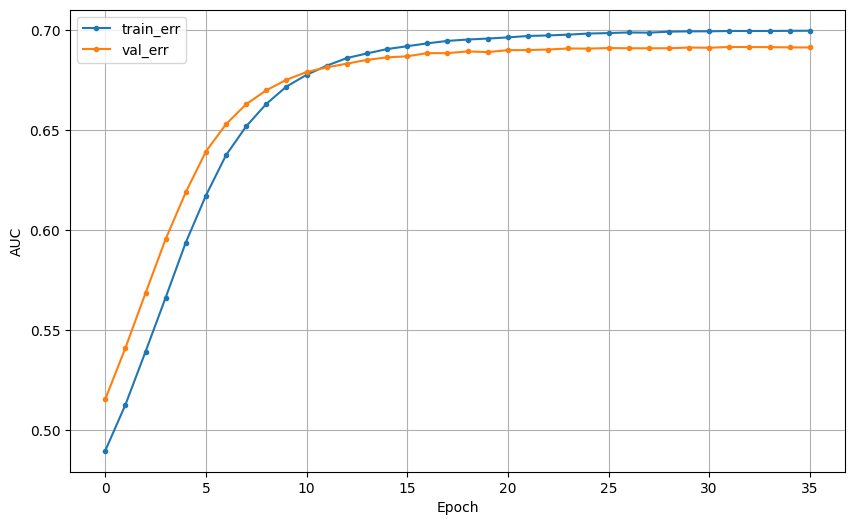

In [144]:
dl_history_plot(history)

### Prediction

In [145]:
print(model.predict(test_df_final).shape)

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
(2062, 1)


In [146]:
from sklearn.metrics import roc_auc_score

# 모델 예측 수행
preds = model.predict(test_df_final)

# 출력 확인
print(preds.shape)  # (샘플 수,) 또는 (샘플 수, 1)

# 필요 시 평탄화 수행
if preds.ndim == 2 and preds.shape[1] == 1:
    preds = preds.flatten()

# 최종 예측 값 출력
print(preds)

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
(2062, 1)
[0.4417018  0.23153664 0.25846675 ... 0.40148255 0.27546915 0.54604787]


### Submission (제출 파일 생성)

In [147]:
submit = pd.read_csv('/content/drive/MyDrive/용훈/Dacon/채무 불이행 확률 예측/open/sample_submission.csv')

# 결과 저장
submit['채무 불이행 확률'] = preds
submit.to_csv('./submission2.csv', encoding='UTF-8-sig', index=False)